## linear model estimation with RANSAC

In [1]:
%matplotlib inline
import os
import numpy as np
import scipy as sp
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import signal
from scipy import io
from sklearn import linear_model, datasets

Estimated coefficients: 
82.1903908407869 [ 82.08533159]


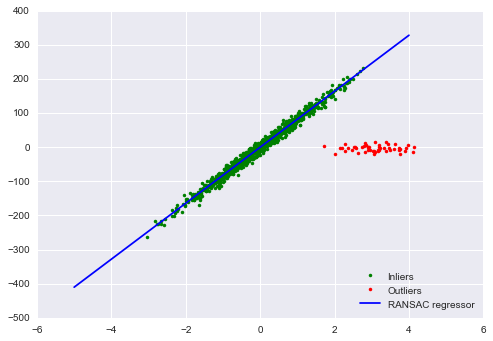

In [2]:
n_samples  = 1000
n_outliers = 50

X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10, coef=True,
                                      random_state=0)

# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

# Fit line using all data
# model = linear_model.LinearRegression()
# model.fit(X, y)

# Robustly fit linear model with RANSAC algo
model_ransac = linear_model.RANSACRegressor(linear_model.LinearRegression())
model_ransac.fit(X, y)
inlier_mask = model_ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Predict data of estimated models
line_X = np.arange(-5, 5)
# line_y = model.predict(line_X[:, np.newaxis])
line_y_ransac = model_ransac.predict(line_X[:, np.newaxis])

# Compare estimated coefficients
print("Estimated coefficients: ")
print(coef, model_ransac.estimator_.coef_)

plt.plot(X[inlier_mask],  y[inlier_mask], '.g', label='Inliers')
plt.plot(X[outlier_mask], y[outlier_mask], '.r', label='Outliers')
# plt.plot(line_X, line_y,        '-k', label='Linear regressor')
plt.plot(line_X, line_y_ransac, '-b', label='RANSAC regressor')
plt.legend(loc='lower right')
plt.show()

In [3]:
filename = 'emodat.mat'
filename = os.path.join('/Users/jorge/Dropbox/research/sandbox/voytek-tutorials/', filename)

data_file = sp.io.loadmat(filename)
srate = data_file['srate'][0][0]
data  = data_file['data'][0]

Length of data:   1476035
Sampling rate:    1017.25 Hz
Duration of data: 1451.00 seconds


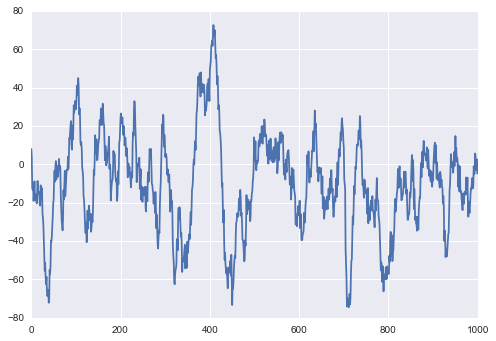

In [4]:
print("Length of data:   {}".format(len(data)))
print("Sampling rate:    {:.2f} Hz".format(np.squeeze(srate)))
print("Duration of data: {:.2f} seconds".format(len(data) / srate))
plt.plot(data[1000:2000]) # Let's plot about a second of the data

In [5]:
newsrate = 512
data = sp.signal.resample(data, int(np.floor(len(data)*(newsrate/srate))))

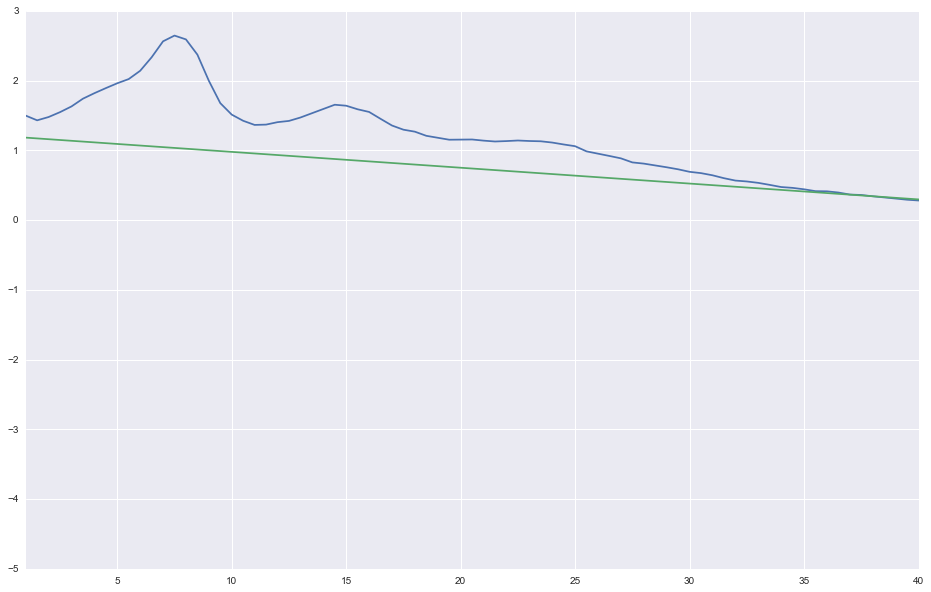

In [19]:
f, psd = sp.signal.welch(data, fs=newsrate, nperseg=newsrate*2, window='hanning')
f = f.reshape((len(f), 1))
psd = psd.reshape((len(psd), 1))

model_ransac = linear_model.RANSACRegressor(linear_model.LinearRegression())
model_ransac.fit(f[20*2:100*2], sp.log10(psd)[20*2:100*2])

fit_line = model_ransac.predict(f)

plt.figure(figsize=(16,10))
plt.xlim([1, 40])

plt.plot(f, np.log10(psd))
plt.plot(f, fit_line)

In [25]:
f.reshape((513, 1))
f
psd

array([[  5.51308039e+00],
       [  3.25568655e+01],
       [  3.14321147e+01],
       [  2.68960049e+01],
       [  2.99950104e+01],
       [  3.52502755e+01],
       [  4.25517633e+01],
       [  5.49519967e+01],
       [  6.58781274e+01],
       [  7.78759030e+01],
       [  9.14153068e+01],
       [  1.05052782e+02],
       [  1.38007035e+02],
       [  2.15307429e+02],
       [  3.65150358e+02],
       [  4.41340758e+02],
       [  3.89057331e+02],
       [  2.35277554e+02],
       [  9.93134595e+01],
       [  4.74537410e+01],
       [  3.24678347e+01],
       [  2.64948534e+01],
       [  2.31095722e+01],
       [  2.33604111e+01],
       [  2.53121302e+01],
       [  2.63787732e+01],
       [  2.95093501e+01],
       [  3.39876628e+01],
       [  3.91069673e+01],
       [  4.50043907e+01],
       [  4.35724768e+01],
       [  3.87261002e+01],
       [  3.54806565e+01],
       [  2.82787753e+01],
       [  2.26631882e+01],
       [  1.97502485e+01],
       [  1.84940840e+01],
 

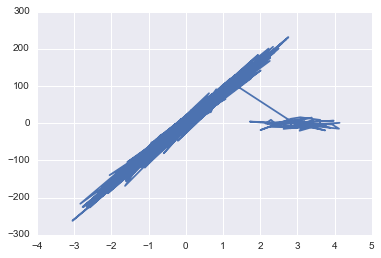

In [23]:
# Robustly fit linear model with RANSAC algo
model_ransac = linear_model.RANSACRegressor(linear_model.LinearRegression())
model_ransac.fit(X, y)
inlier_mask = model_ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Predict data of estimated models
line_X = np.arange(-5, 5)
# line_y = model.predict(line_X[:, np.newaxis])
line_y_ransac = model_ransac.predict(line_X[:, np.newaxis])


In [29]:
f[sp.arange(10, 100), sp.newaxis]

array([[  5. ],
       [  5.5],
       [  6. ],
       [  6.5],
       [  7. ],
       [  7.5],
       [  8. ],
       [  8.5],
       [  9. ],
       [  9.5],
       [ 10. ],
       [ 10.5],
       [ 11. ],
       [ 11.5],
       [ 12. ],
       [ 12.5],
       [ 13. ],
       [ 13.5],
       [ 14. ],
       [ 14.5],
       [ 15. ],
       [ 15.5],
       [ 16. ],
       [ 16.5],
       [ 17. ],
       [ 17.5],
       [ 18. ],
       [ 18.5],
       [ 19. ],
       [ 19.5],
       [ 20. ],
       [ 20.5],
       [ 21. ],
       [ 21.5],
       [ 22. ],
       [ 22.5],
       [ 23. ],
       [ 23.5],
       [ 24. ],
       [ 24.5],
       [ 25. ],
       [ 25.5],
       [ 26. ],
       [ 26.5],
       [ 27. ],
       [ 27.5],
       [ 28. ],
       [ 28.5],
       [ 29. ],
       [ 29.5],
       [ 30. ],
       [ 30.5],
       [ 31. ],
       [ 31.5],
       [ 32. ],
       [ 32.5],
       [ 33. ],
       [ 33.5],
       [ 34. ],
       [ 34.5],
       [ 35. ],
       [ 35.5],
       [